# Churn Analysis

Churn refers to when a customer stops paying for a service and essentially leaves, meaning they are no longer a customer. The term is business-focused, describing how companies view customer departures, although most consumers are unfamiliar with it

Churn is terrifying for Telecoms because:

    a. It causes an immediate drop in revenue, which can affect:
        - Cash flow, which the company relies on to invest in further services.
        - The overall profit (bottom line).
        - The stock price of a public company, potentially upsetting shareholders and company executives who often hold significant shares.
    b. Acquiring new customers to replace lost revenue is difficult and costly.
    c. Once customers leave, they don't return.
    d. Efforts to win back customers usually involve costly promotions, such as offering steep discounts (e.g., 50% off for a year), which hurts profitability and can upset current customers who are paying full price.

This project aims to analyze the main reasons behind churning and therefore propose the appropriate strategies to improve the churn rate

## Dataset

The included dataset has the following variables (columns):

- `customer_id`: Unique identifier for each customer.
- `gender`: Customer's gender (Male, Female).
- `senior_citizen`: Whether the customer is 65 or older (Yes, No).
- `partner`: Whether the customer has a spouse or domestic partner (Yes, No).
- `dependents`: Whether the customer has dependents (e.g., children, parents) (Yes, No).
- `tenure`: Number of months the customer has been with the company.
- `phone_service`: Subscription to home phone service (Yes, No).
- `multiple_lines`: Subscription to multiple telephone lines (Yes, No).
- `internet_service`: Type of Internet service subscribed to (No, DSL, Fiber Optic, Cable).
- `online_security`: Subscription to additional online security service (Yes, No).
- `online_backup`: Subscription to additional online backup service (Yes, No).
- `device_protection`: Subscription to additional device protection plan for Internet equipment (Yes, 
No).
- `tech_support`: Subscription to additional technical support plan with reduced wait times (Yes, No).
- `streaming_tv`: Use of Internet service to stream television programming from third party without 
additional fee (Yes, No).
- `streaming_movies`: Use of Internet service to stream movies from third party without additional fee (Yes, No).
- `contract`: Type of customer's current contract (Month-to-Month, One Year, Two Year).
- `paperless_billing`: Whether the customer has opted for paperless billing (Yes, No).
- `payment_method`: Customer's payment method (Bank Withdrawal, Credit Card, Mailed Check).
- `monthly_charges`: Current total monthly charge for all services.
- `total_charges`: Total charges to the end of the specified quarter.
- `churn`: Whether the customer left the company this quarter (Yes, No).

## 1. Data Preparation

### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Import Scikit-learn's OrdinalEncoder class
from sklearn.preprocessing import OrdinalEncoder

# Import Scikit-learn's OneHotEncoder class
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [2]:
df = pd.read_csv ("skill-building-with-logistic-regression-dataset.csv")

## 2. Exploratory Data Analysis

### Data Overview

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,No,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,No,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,No,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,Yes


**Comment:**

- There are 7043 rows of data
- There are 21 columns of data
- Most of the columns appear to be categorical, except for the columns "tenure", "monthly_charges", and "total_charges"

### Summary of Data

In [5]:
# Your implementation:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   object 
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

**Comments:**

- In this context, 'object' data type means categorical data type, or equivalent to string
- There are 7043 rows in total, so there must be missing values within the columns "total_charges"


### Check missing values

In [6]:
# Your implementation:

df.isnull().sum()

customer_id           0
gender                0
senior_citizen        0
partner               0
dependents            0
tenure                0
phone_service         0
multiple_lines        0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
contract              0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
churn                 0
dtype: int64

**Comments:**

- As seen from the above output, there are 11 missing values in the column "total_charges"

### Forcing Jupyter Notebook to display float values with `2` decimals of precision

In [7]:
my_float_format = "{:.2f}"
pd.options.display.float_format = my_float_format.format

### Data Statistics

In [8]:
df.describe().loc[["mean", "min", "max"]]

,tenure,monthly_charges,total_charges
mean,32.37,64.76,2283.30
min,0.00,18.25,18.80
max,72.00,118.75,8684.80


**Comments:**

- Only some of the variables (columns) are included in the output because they are the only columns with numerical values.
- The average tenure (in years) of a customer is 32.37 years.
- The average bill (i.e., monthly charges) for a customer is $64.76.
- Based on the max total charges for a customer, this variable appear to be a "customer lifetime value" amount, because the max total charges is approximately 73 times the monthly charges.

### Visualize the customer demographics:
    - `gender`
    - `senior_citizen`
    - `partner`
    - `dependents`


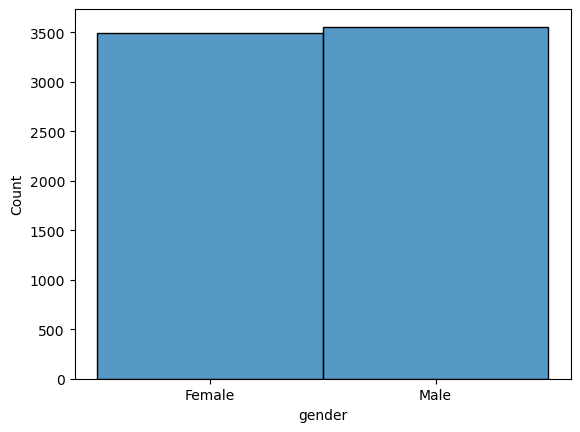

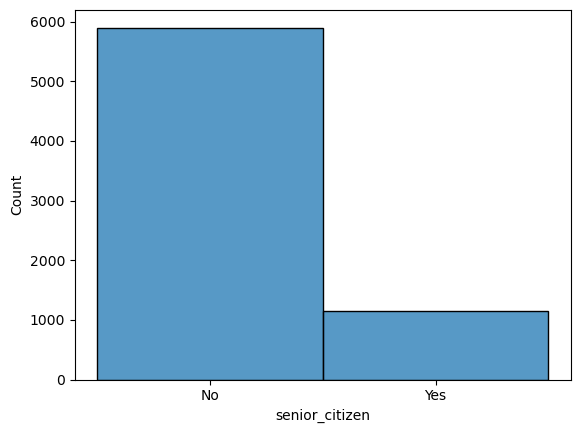

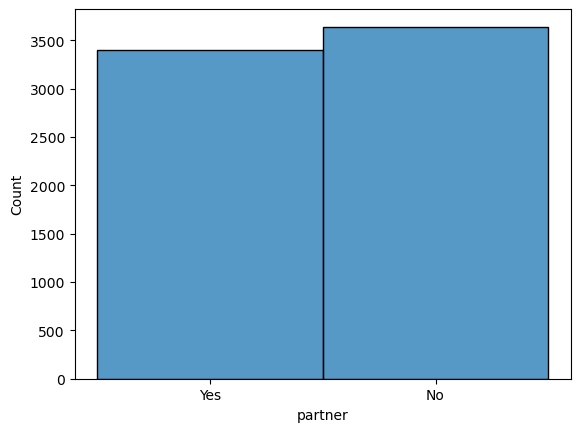

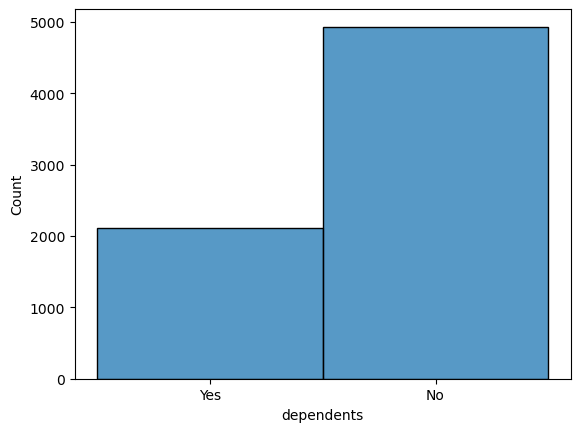

In [9]:
column_names = [ "gender", "senior_citizen", "partner", "dependents" ]
for column_name in column_names:
    sns.histplot ( df [ column_name ] )
    plt.show ()

**Reflections:**

- As there are more male than female customers, the customer base skews towards males.
- The majority of customers are not Senior Citizens.
- The majority of customers does not have dependents

### Visualize the counts of the subscribed services:
    - `phone_service`
    - `multiple_lines`
    - `internet_service`
    - `online_security`
    - `online_backup`
    - `device_protection`
    - `tech_support`
    - `streaming_tv`
    - `streaming_movies`

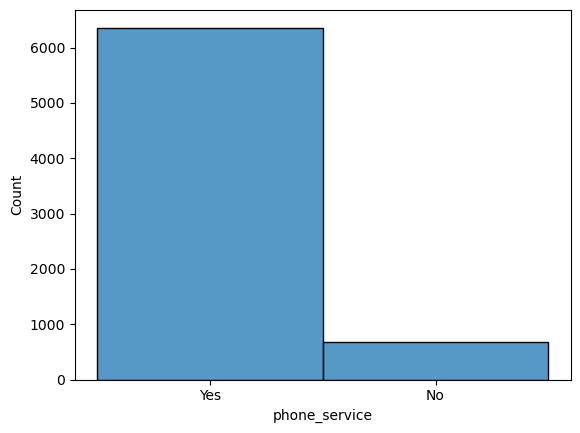

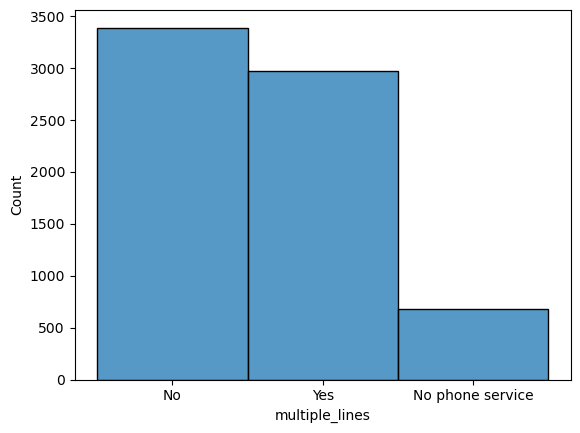

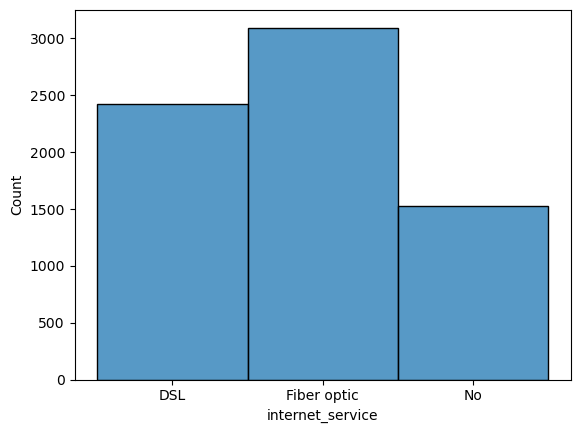

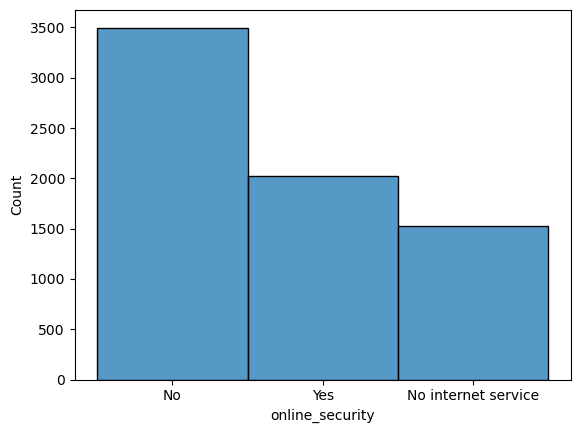

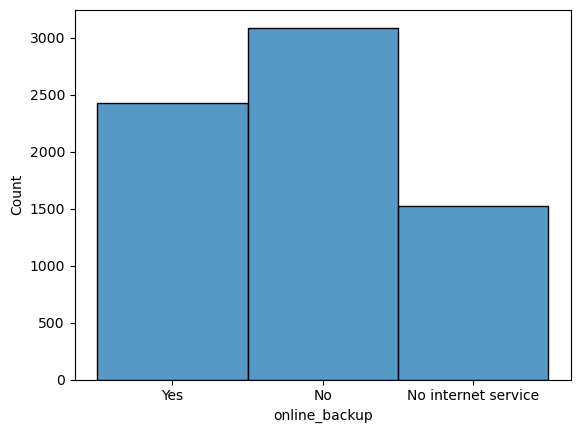

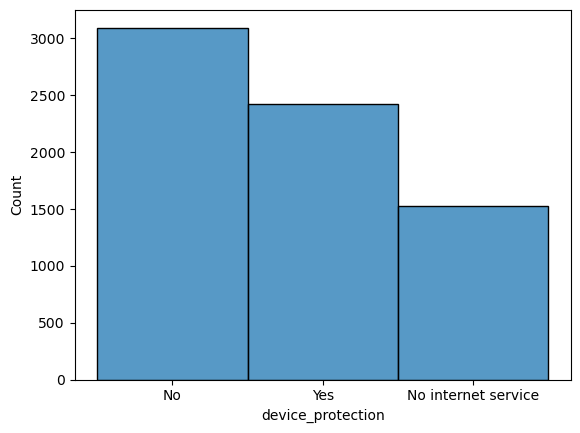

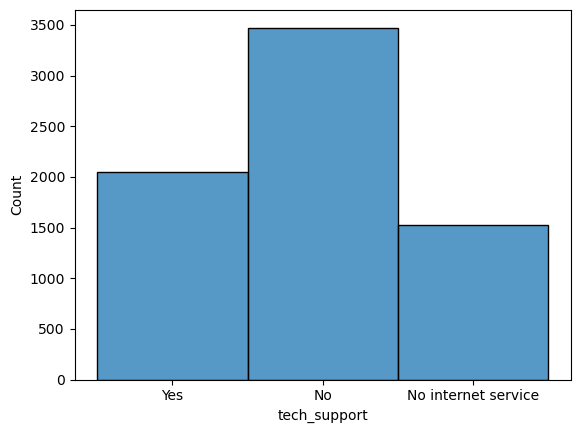

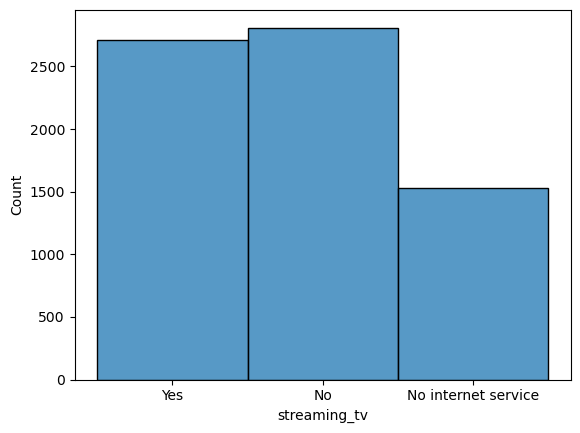

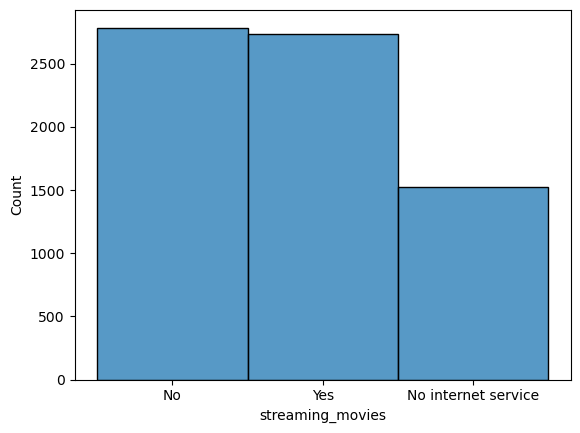

In [10]:
# Your implementation:

# Your implementation:

column_names = [ "phone_service", "multiple_lines", "internet_service", "online_security", "online_backup", "device_protection", "tech_support", "streaming_tv", "streaming_movies" ]
for column_name in column_names:
    sns.histplot ( df [ column_name ] )
    plt.show ()

**Comments:**

- The majority of customers has Phone Service
- The majority of customers has Internet Service
- For those that have Internet Service, Fiber optic internet_service is the most popular

### Visualize the counts of the account information:
    - `tenure`
    - `contract`
    - `paperless_billing`
    - `payment_method`
    - `monthly_charges`
    - `total_charges`
    - `churn`

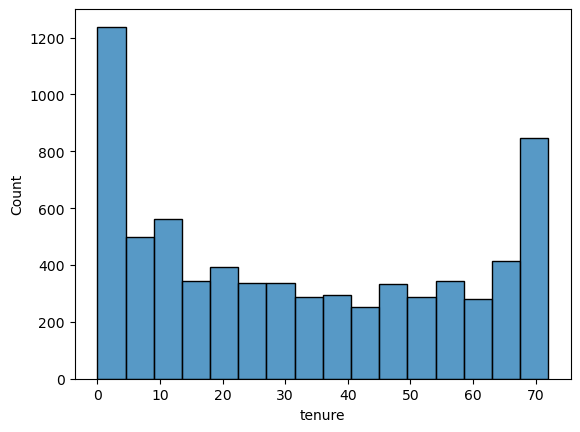

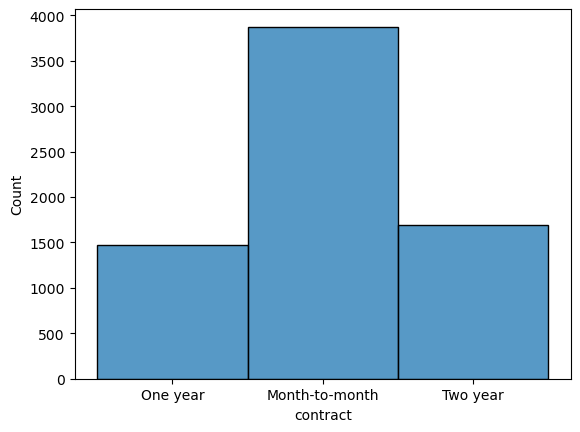

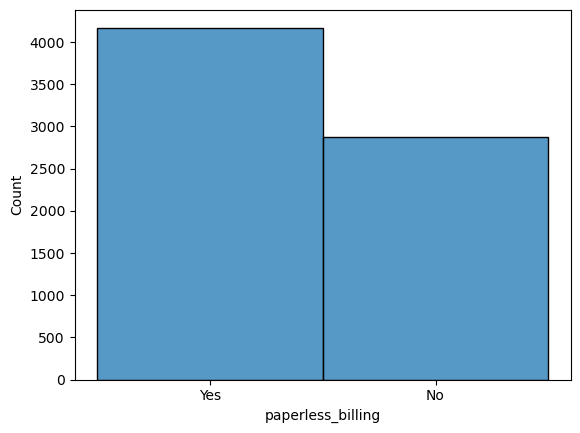

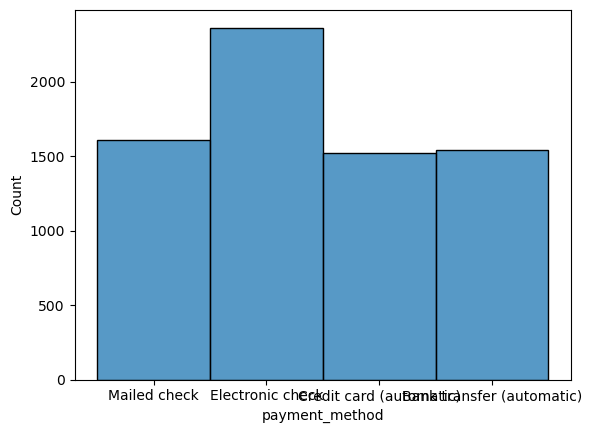

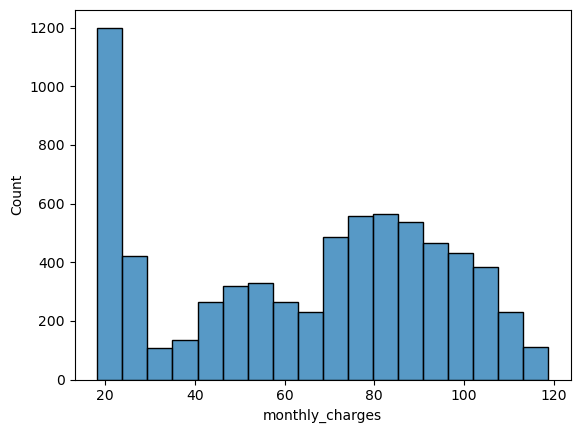

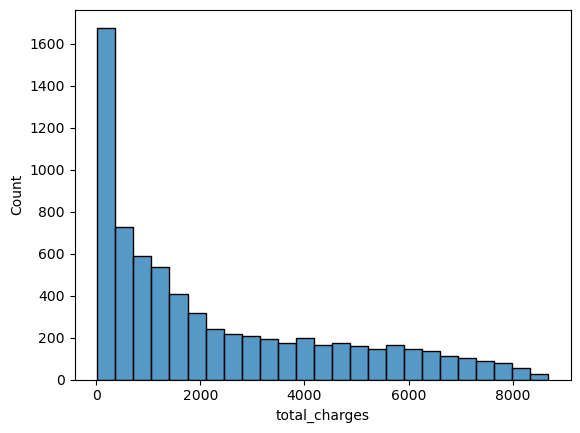

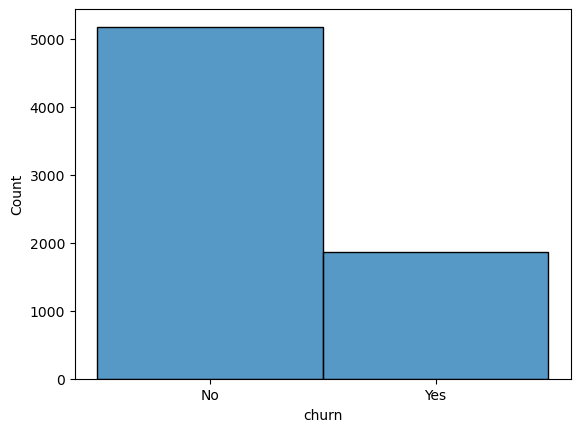

In [10]:
column_names = [ "tenure", "contract", "paperless_billing", "payment_method", "monthly_charges", "total_charges", "churn" ]
for column_name in column_names:
    sns.histplot ( df [ column_name ] )
    plt.show ()

**Comments:**

- The interesting thing about the distribution for Tenure is that the histogram has a lot many more bins (since Tenure is a numerical variable). Another interesting thing is that the histogram is bimodal, with customers mostly fall into the two most extreme tenure groups "0-5" or "about 70". The rest of the tenure lengths are approximately evenly distributed
- The majority of customers is on a Month-to-Month contract
- The majority of customers prefers paperless billing
- The interesting thing about the distribution for Monthly Charges is that the histogram has a lot many more bins (since Tenure is a numerical variable). Most customers pay a monthly charge of 20, but aside from that, people often pay ~70-100.
- The fact that the distribution of Total Charges has "long tail" indicates that most customers are paying at the lower end of the range (~0 - 400), with a few very high total charges extending the tail of the distribution towards the higher end. This suggests that while the majority of charges are relatively low, there are some extreme or outlier charges that contribute to the long tail
- The majority of customers has not churned

## 3. Data Manipulation

### Replace missing values

In [11]:
df["total_charges"].fillna(df["total_charges"].mean(), inplace = True)

### Create bins with the following labels for the `tenure` variable and persist in a new column in `df_one_hot_encoded` called `tenure_binned`:
    - 0 to 9
    - 10 to 19
    - 20 to 29
    - 30 to 39
    - 40 to 49
    - 50 to 59
    - 60 to 69
    - 70 to 79
    - 80 to 89


In [12]:
bins = [-1, 9, 19, 29, 39, 49, 59, 69, 79, 89]
labels = ['0 to 9', '10 to 19', '20 to 29', '30 to 39', '40 to 49', '50 to 59', '60 to 69', '70 to 79', '80 to 89']
df_one_hot_encoded = pd.DataFrame()
df_one_hot_encoded['tenure_binned'] = pd.cut(df['tenure'], bins=bins, labels = labels)
print("The number of bins for each label is:")
for label in labels:
    count = df_one_hot_encoded[df_one_hot_encoded["tenure_binned"] == label].count().iloc[0]
    print(label, ":", count)

The number of bins for each label is:
0 to 9 : 1854
10 to 19 : 953
20 to 29 : 762
30 to 39 : 653
40 to 49 : 648
50 to 59 : 690
60 to 69 : 832
70 to 79 : 651
80 to 89 : 0


### Convert categorical variables to numeric using One-Hot Encoding and all numeric variables to floats


In [13]:
# Your implementation:

df_churn = df["churn"].copy()
df_dropped = df.copy()
for variable in ["churn", "customer_id", "tenure"]:
    del df_dropped[variable]
df_one_hot_encoded = df_dropped.join(df_one_hot_encoded)
df_one_hot_encoded = pd.get_dummies(df_one_hot_encoded)
df_one_hot_encoded = df_one_hot_encoded.astype(float)
df_one_hot_encoded['churn'] = df_churn
df_one_hot_encoded.columns = df_one_hot_encoded.columns.str.lower()
df_one_hot_encoded.columns = df_one_hot_encoded.columns.str.replace(' ', '_')
df_one_hot_encoded.columns = df_one_hot_encoded.columns.str.replace("(","")
df_one_hot_encoded.columns = df_one_hot_encoded.columns.str.replace(")","")

df_one_hot_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 55 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   monthly_charges                         7043 non-null   float64
 1   total_charges                           7043 non-null   float64
 2   gender_female                           7043 non-null   float64
 3   gender_male                             7043 non-null   float64
 4   senior_citizen_no                       7043 non-null   float64
 5   senior_citizen_yes                      7043 non-null   float64
 6   partner_no                              7043 non-null   float64
 7   partner_yes                             7043 non-null   float64
 8   dependents_no                           7043 non-null   float64
 9   dependents_yes                          7043 non-null   float64
 10  phone_service_no                        7043 non-null   floa

### Splitting the data for training and testing

In [14]:
X = df_one_hot_encoded. loc[:, df_one_hot_encoded. columns != 'churn'].copy()
y = df_one_hot_encoded ['churn'].copy()
y.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 42,shuffle = True)


## Model training

In [15]:
model = LogisticRegression (max_iter = 200)
model.fit (X_train, y_train)
df_results = pd.DataFrame()
variable_names = X_train.columns
coefficients = model.coef_[0]
df_results['Variable'] = variable_names
df_results['Coefficient'] = coefficients
df_results['Odds Ratio'] = np.exp(df_results['Coefficient'])
df_results = df_results.sort_values(by='Odds Ratio', ascending=False)

df_results

,Variable,Coefficient,Odds Ratio
36,contract_month-to-month,0.83,2.30
45,tenure_binned_0_to_9,0.79,2.20
16,internet_service_fiber_optic,0.38,1.46
43,payment_method_electronic_check,0.17,1.19
32,streaming_tv_yes,0.10,1.10
18,online_security_no,0.08,1.09
27,tech_support_no,0.08,1.08
35,streaming_movies_yes,0.07,1.07
21,online_backup_no,0.05,1.05
14,multiple_lines_yes,0.05,1.05


## 5. Evaluation

- **Make** predictions using the `X_test` data created

In [16]:
y_predictions = model.predict (X_test)
data = { "Actual": y_test, "Predicted": y_predictions }
dfCompare = pd.DataFrame (data)
dfCompare.head(10)


,Actual,Predicted
185,No,No
2715,No,No
3825,No,No
1807,No,No
132,No,No
1263,Yes,Yes
3732,No,No
1672,No,No
811,No,No
2526,No,No


### Evaluate performance using the metrics: Accuracy Score, Precision Score, Recall Score, F1 Score

In [18]:
# accuracy score
print ("Accuracy Score",accuracy_score (y_test, y_predictions))

# precision score
print ("Precision Score:",precision_score (y_test, y_predictions,pos_label='Yes'))

#recall score
print ("Recall Score",recall_score (y_test, y_predictions,pos_label='Yes'))

#F1 score
print ("F1 Score:",f1_score (y_test, y_predictions,pos_label='Yes'))


Accuracy Score 0.807382867960246
Precision Score: 0.6698113207547169
Recall Score 0.515426497277677
F1 Score: 0.5825641025641026


## 6. Insights

### The `3` most influential factors driving customer churn are
1. contract_month-to-month
2. tenure_binned_0_to_9
3. internet_service_fiber_optic

### Based on my analysis, `3` actionable strategies this company could implement in order to reduce churn are

1. **About month-to-month contracts:** We should encourage people to sign longer contract (1-2 years) for greater commitment and less likelihood to churn. We can introduce greater benefits associated with long-term contracts to attract customers away from monthly contracts
2. **About tenure:** People with 0-9 month tenure are most likely to churn, so again we should create special benefits to retain customers better. Reducing the number of people signing month-to-month contracts can also greatly decrease the number of customers using for less than a year. Combined with the first strategy, we can offer reward programs like "the longer they stay, the greater the benefits".
3. **About internet service:**: The fact that customers using fiber optic internet service are the third likely reason for them to churn, compared to customers using dsl internet service are the second least likely reason for to churn shows that customers would still need internet service, yet the problem lies in fiber optic internet service. It is possible that fiber optic internet service gives customers very bad experience using, so we should look into the quality and performance of fiber optic internet service and improve on the malfunctions. This could entail improving infrastructure, boosting network capacity, and promptly resolving technical issues to guarantee customers a dependable and steady internet service.





### Performance Evaluation

The recall score is lowest among all (~51%) so this metric best indicates thte need for further research and model improvement. This means that the moel only correctly identifies 51% of the customers. This means that the variables we are using are not a good enough measure of why customers churn, so other metrics and further data are required to better predict churning reasons.